>### Méthodologie
>
>1. Tout d'abord, vous devez connaître la nature du signal/de la série. Je suggère de le tracer et de voir si vous pouvez reconnaître un modèle, si la courbe a une certaine tendance ou si la variance de la serie est stable ou non (serie additive ou multiplicative). Parfois, c'est clair pour les yeux, d'autres fois, vous devriez regarder davantage les choses. Comme par exemple, vous pouvez voir la décomposition de la série en utilisant la méthode season_decompose. De plus, parfois, l'autocorrélation ACF et l'autocorrélation partielle PACF de la série peuvent aider. Si la tendance n'est pas aussi claire, vous pouvez vérifier si le signal est stationnaire ou non (c'est-à-dire s'il a une tendance et cela peut être fait en utilisant des tests d'hypothèse comme le test de Dickey-Fuller augmenté).
>
>
>2. Maintenant, vous connaissez la composition de votre signal. Passons maintenant à la partie mathématique lorsque nous calculerons la différenciation du signal jusqu'à ce qu'il n'ait plus de composante saisonnière ni de tendance. En d'autres termes jusqu'à ce qu'il devienne stationnaire.
>
>- **a.** Si nous sommes face à une série temporelle dont le comportement est visiblement celui d'une série multiplicative, nous nous ramènerons toujours au cas de figure additif pour pouvoir dresser des relations linéaire. On passe d'un modèle multiplicatif à additif par une transformée logarithmique.
>
>- **b.** si votre signal a une tendance et une saisonnalité, vous différencierez principalement en fonction de la période de saisonnalité, puis une simple différenciation pour éliminer la tendance comme signal.diff(12).diff(1) si mon signal a une saisonnalité de 12 et une tendance linéaire. Habituellement, une différenciation de la saisonnalité du signal suffit. Cependant, vous pourriez avoir besoin de plus d'une simple différenciation de tendance. **PS : le nombre de fois que votre différenciation pour la saisonnalité ou pour la tendance correspond aux paramètres D et d du modèle SARIMA (c'est-à-dire la partie intégrée de SARIMA).**
>
>
>- **c.** si votre signal n'a qu'une tendance. Facile, vous ne ferez qu'une différenciation simple et vous utiliserez le modèle ARIMA car aucune saisonnalité.
>
>
>- **d.** si seulement la saisonnalité vous faites la différenciation de la saisonnalité, vous utiliserez le modèle SARIMA et le paramètre de différenciation de tendance "p" est égal à zéro.
>
>
>- **e.** si aucune tendance ni saisonnalité, cela signifie que votre signal est déjà stationnaire, vous pouvez directement utiliser ARIMA avec d égal à zéro. Cependant, prévoir cela sera assez difficile. Parce que cela signifie qu'il s'agit d'un bruit presque aléatoire (bruit blanc).
>
>
>3. Une fois que vous avez rendu votre signal stationnaire, nous allons maintenant identifier les autres paramètres (p et P pour le composant auto-régressif et le composant auto-régressif saisonnier) et (q et Q pour les composants de moyenne mobile et de moyenne mobile saisonnière). La partie délicate :
>
>
>- **a.** Le tracé ACF vous donne une idée de la corrélation entre votre signal et ses décalages précédents. Ce graphique aidera à identifier les composants de la moyenne mobile. Nous examinons donc les retards les moins bien classés et voyons ceux qui sont significatifs. et le premier est votre q. Maintenant, si vous avez une composante saisonnière, regardez les multiples de la période de saisonnalité, si vous trouvez des décalages importants, c'est votre Q.
>
>
>- **b.** Le tracé PACF donne une idée de la partie auto-régressive du modèle. Comme pour l'ACF, nous identifions p avec des décalages de rang de loi et P (si nous avons une composante saisonnière) est identifié à travers les multiples de la période de saisonnalité.
>
>
>Maintenant, cela vous donne un bon point de départ. Vous pouvez toujours opter pour des modules automatisés. Et vous pouvez pousser les résultats plus loin en utilisant la recherche par grille.
>
>
>Maintenant, allons-y pour quelques exemples de ceci.

> ### 0. Appropriation des series temporelles

https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import time

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 100)

> On importe le jeu de données en indiquant que la variable date est l'index avec **"index_col"** et que l'index est bien de type **"datetime"** avec **"parse_dates = True"**

In [58]:
data = pd.read_csv('DailyDelhiClimateTrain.csv', index_col='date', parse_dates=True)

In [59]:
data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [60]:
data.shape

(1462, 4)

In [61]:
data.dtypes

meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

> On verifie qu'il n'y ait pas de valeurs manquantes (NaN)

In [62]:
data.isna().sum().sort_values(ascending=False)

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

> Nous affichons graphiquement les données Originales.

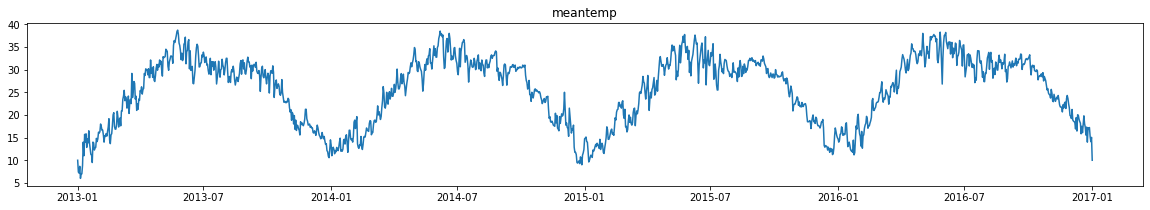

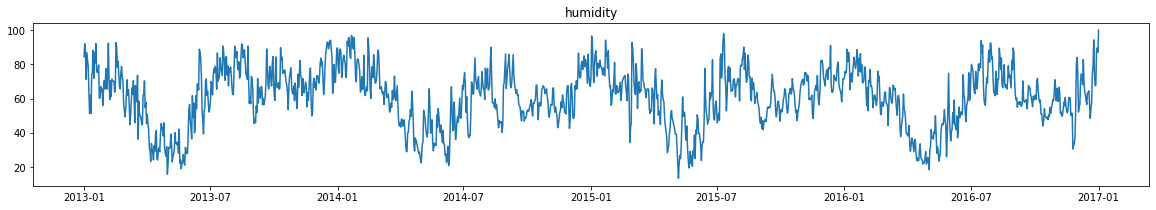

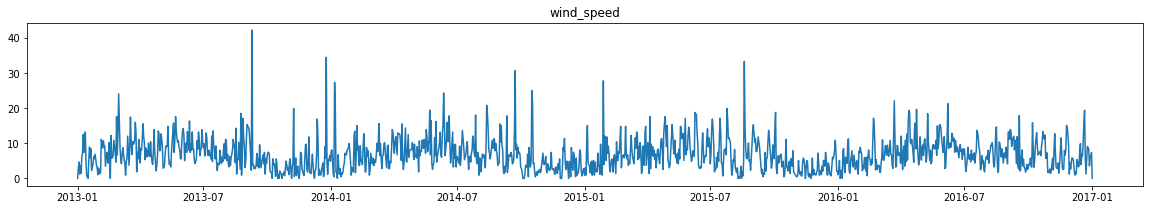

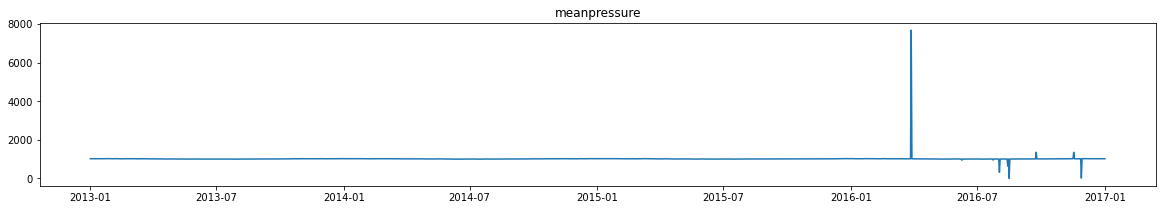

In [63]:
for i in data:
    plt.figure(figsize=(20,3))
    plt.plot(data[i])
    plt.title(i)

> Nous pouvons déja constater que la variable "meanpressure" contient des valeurs abérrantes (outliers). 
>
> Visuellement, ces outliers seraient des valeurs extremes hautes et extremement basses.
>
>Effectuons une description qui confirmerait ce constat.

In [64]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,1462.0,25.495521,7.348103,6.000000,18.857143,27.714286,31.305804,38.714286
humidity,1462.0,60.771702,16.769652,13.428571,50.375000,62.625000,72.218750,100.000000
wind_speed,1462.0,6.802209,4.561602,0.000000,3.475000,6.221667,9.238235,42.220000
meanpressure,1462.0,1011.104548,180.231668,-3.041667,1001.580357,1008.563492,1014.944901,7679.333333


> Effectivement, en observant la différence entre les valeurs max et min par rapport aux quartiles de la variable dans le tableau de description, nous pouvons supposer qu'il y ait des outliers
> 
> Regardons les valeurs les plus hautes et les plus basses de la variable.

In [65]:
print(f"min_values:\n {data['meanpressure'].sort_values(ascending=True).head(10)}\n")
print(f"max_values: \n {data['meanpressure'].sort_values(ascending=False).head(10)}")

min_values:
 date
2016-08-16     -3.041667
2016-11-28     12.045455
2016-08-02    310.437500
2016-08-14    633.900000
2016-06-09    938.066667
2016-07-24    946.312500
2014-06-20    991.375000
2014-06-08    993.125000
2014-06-09    993.125000
2014-06-19    993.250000
Name: meanpressure, dtype: float64

max_values: 
 date
2016-03-28    7679.333333
2016-09-24    1352.615385
2016-11-17    1350.296296
2014-01-19    1023.000000
2014-12-19    1022.125000
2015-02-04    1022.000000
2015-12-25    1022.000000
2013-01-22    1021.800000
2013-01-19    1021.666667
2014-12-18    1021.375000
Name: meanpressure, dtype: float64


> Notre hypothèse se confirme, nous avons 5 valeurs anormalement basses et 3 valeurs anormalement hautes.

> ### 1. Traitements sur les données
> Supprimons les outliers.

In [66]:
data = data[(data['meanpressure'] >950) & (data['meanpressure']<1090)]

> Et voici le résultat

In [67]:
mean_pressure = data['meanpressure']

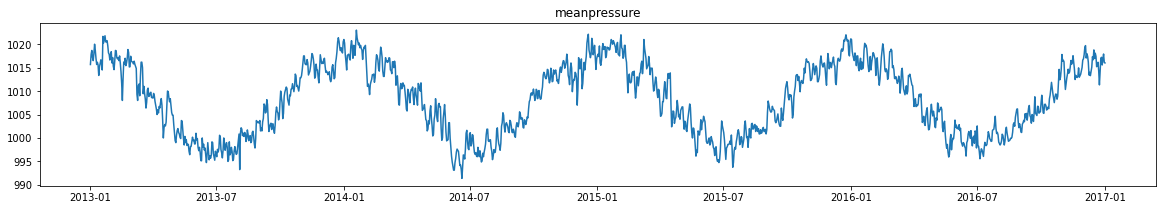

In [68]:
plt.figure(figsize=(20,3))
plt.plot(mean_pressure)
plt.title(mean_pressure.name);

> **Pour la suite nous n'allons retenir que la variable "meanpressure" pour faciliter la comprehension de la méthodologie**

>### 2. Est-ce que la serie est stable?
> #####  a. Modele additif ou multiplicatif?

> Avant toute chose, nous allons verifier si la variance de la serie temporelle est stable.  
>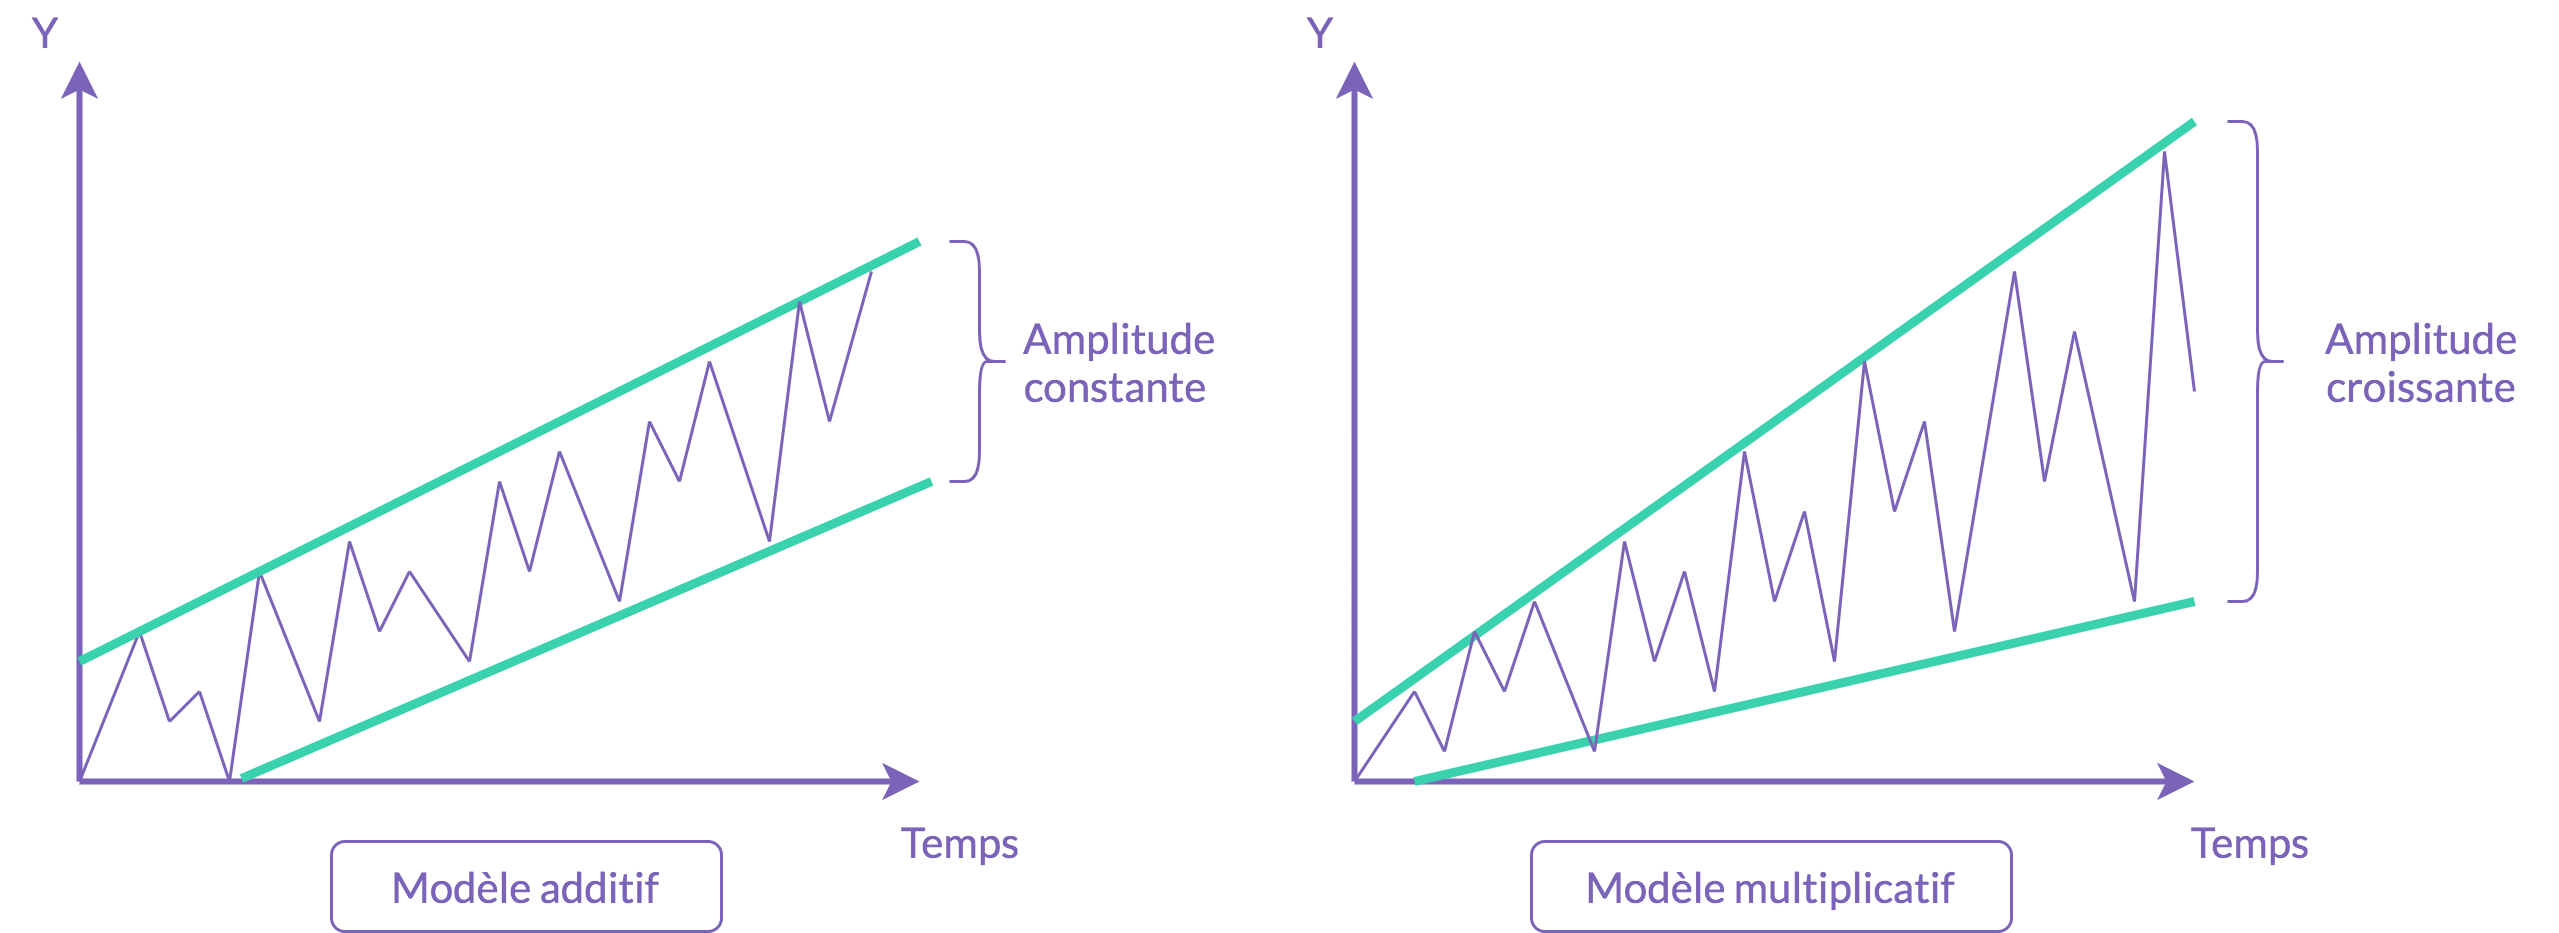
> 
> Comme il est difficile à l'oeil nu d'identifier si la serie est de type additif ou multiplicatif,  une quelconque stabilité de la variance de la serie temporelle, nous allons dans un premier temps décomposer la serie temporelle en supposant que la variance est stable (modele additif).

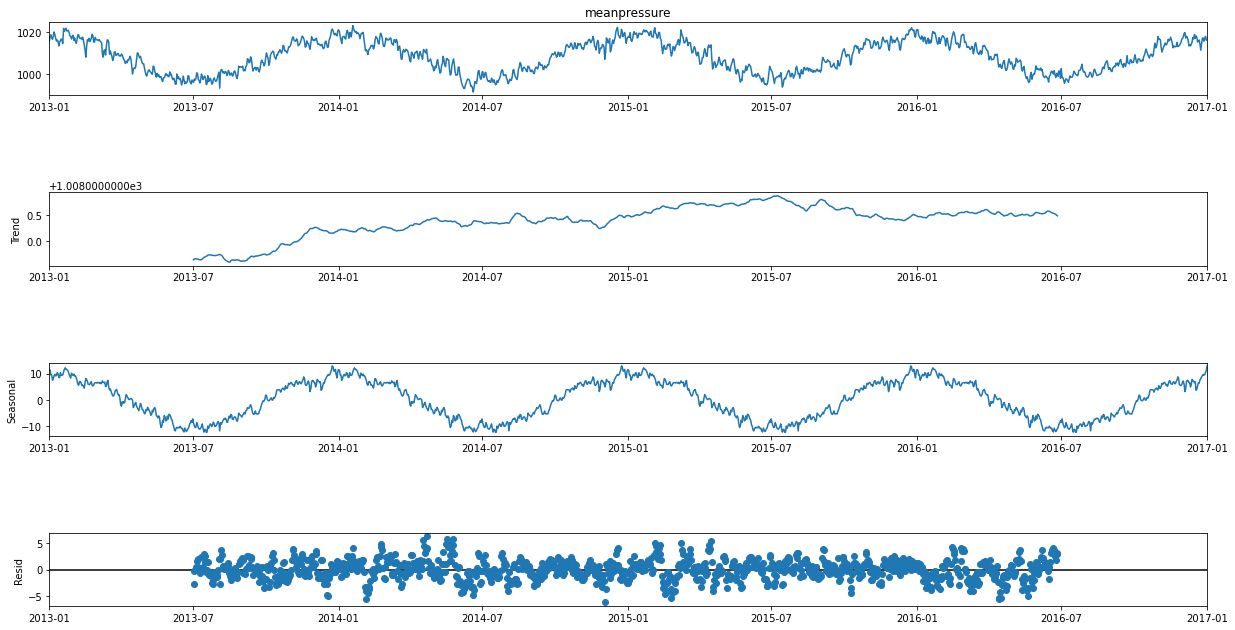

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(mean_pressure,model = 'additive', period=365)
decomposition.plot().set_size_inches(20,10)
plt.show()

> Ici, on peut rapidement conclure que la décomposition n'a pas été réussie. En effet, le résidu présente de grandes variations en fonction du temps. En théorie, on considère qu'une décomposition est réussie si la partie résiduelle peut être assimilée à ce que l'on appelle un bruit blanc faible.
>
> Nous pouvons donc supposer que la variance de la serie temporelle n'est pas stable et donc que le modèle est multiplicatif.Nous allons donc effectuer une nouvelle décomposition en selectionnant un modele multiplicatif dans les parametres pour vérifier cela 

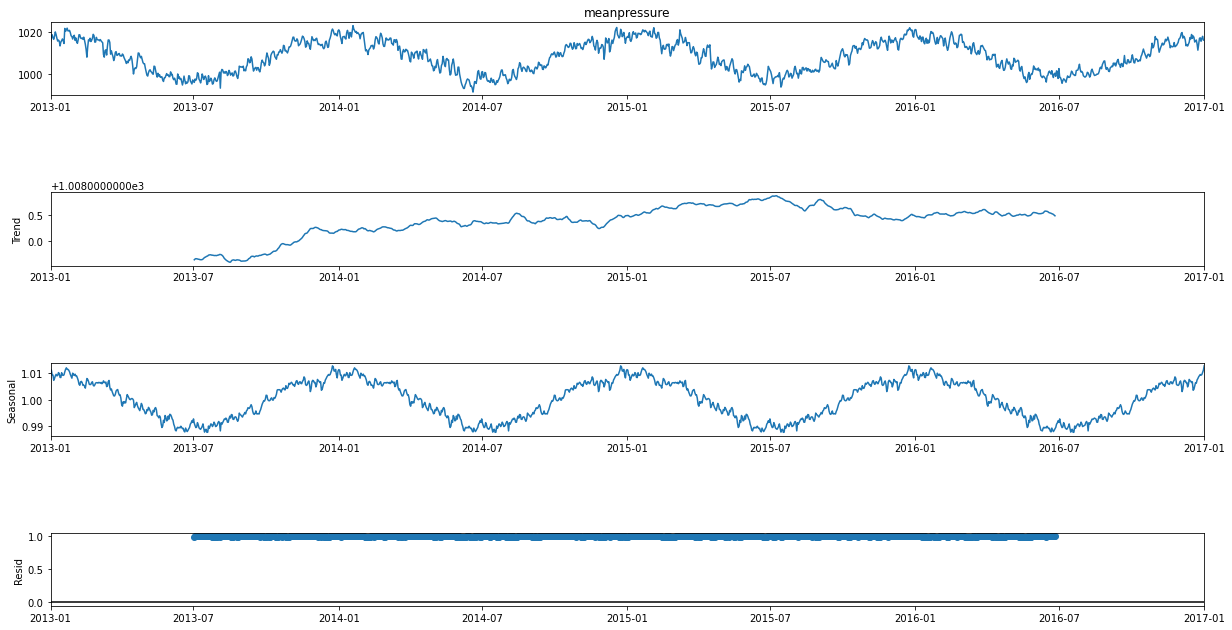

In [70]:
decomposition = seasonal_decompose(mean_pressure, model= 'multiplicative',period=365)
decomposition.plot().set_size_inches(20,10)
plt.show()

> On a effectivement une **décomposition** plus satisfaisante. On peut identifier une **tendance** croissante linéairement dépendante du temps, ainsi qu'une **saisonnalité** de période 12 (annuelle)
>
> Lorsque nous sommes dans le cas d'un modèle **multiplicatif**, pour pouvoir analyser la série nous nous ramenons toujours à un modèle **additif** par une transformée en *$\log$*.

> NOTE: Après transformée en log, pour retrouver la série originale on passe à l'exponentielle :  exp(log(X𝑡))=X𝑡 .


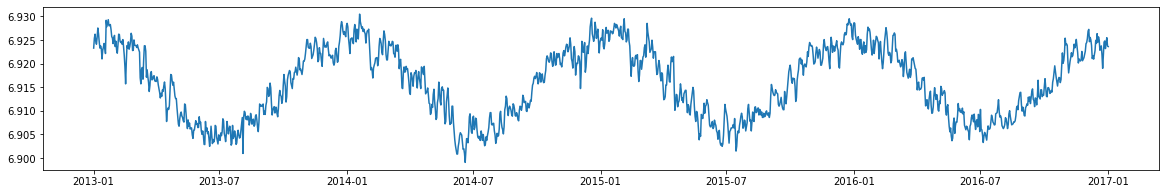

In [71]:
mean_pressure_log = np.log(mean_pressure)

plt.figure(figsize=(20,3))
plt.plot(mean_pressure_log)
plt.show()

>##### b. Tendance? Saisonnalité?
>
>D'apres la décomposition ci-dessus,  Nous identifions clairement une tendance, puisque la moyenne mobile augmente. De plus, il semble que nous ayons un modèle saisonnier dans les données.
>
>Pour determiner si la série temporelle est stationnaire nous utiliserons:
>
>- **Le Test de Dickey-Fuller augmenté (ADF)** : La série temporelle est considérée comme stationnaire si la p-value inférieur à 0.05 (selon l’hypothèse nulle) et si les valeurs critiques à des intervalles de confiance de 1%, 5%, 10% sont aussi proches que possible des statistiques de l’ADF.
>
>Verifions cela tout de suite.

In [72]:
from statsmodels.tsa.stattools import adfuller

In [73]:
    result = adfuller(mean_pressure_log)
    print(f'\n{mean_pressure_log.name.upper()}')
    print(f'Statistiques ADF  : {result[0]}')
    print(f'p-value : {result[1]}')
    print('Valeurs Critiques :')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')


MEANPRESSURE
Statistiques ADF  : -2.1349952115709674
p-value : 0.23067759557689022
Valeurs Critiques :
	1%: -3.4348929812602784
	5%: -2.863546418485167
	10%: -2.5678382024888378


> On peut observer que meme si la statistique ADF est proche des valeurs critiques avec des intervalles de confiance de 1%, 5%, 10%, notre serie temporelle n'est pas stationnaire car la **p_value > 0.05**
>
>
>Elle comporte à la fois une tendance et une composante saisonnière. Ainsi, nous utiliserons le modèle SARIMAX. Il faut donc définir les paramètres suivants : SARIMAX=(p,d,q)x(P,D,Q,m) Où :
>
>- p est la composante auto-régressive,
>- d est l'ordre de différenciation utilisé pour éliminer la tendance,
>- q est la composante moyenne mobile,
>- P est la composante saisonnière-auto-régressive,
>- D est l'ordre de la différenciation saisonnière,
>- Q est la composante moyenne mobile saisonnière, et
>- m est la période saisonnière
>
>Commençons à différencier les séries chronologiques.

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

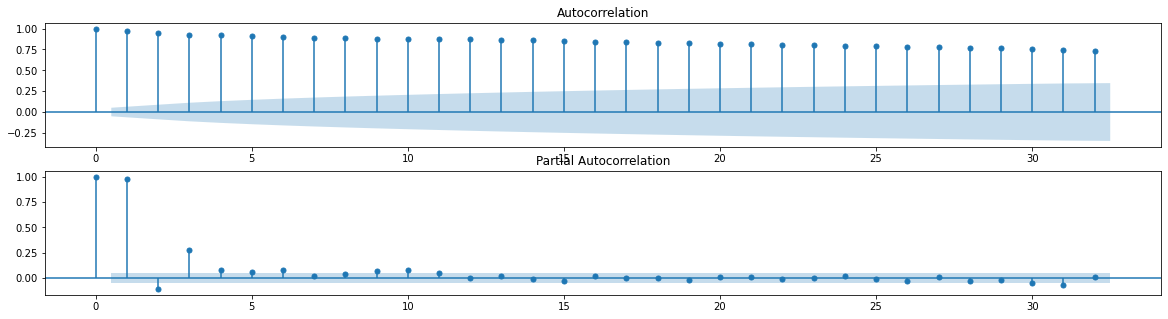

In [75]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (20,5))
acf = plot_acf(mean_pressure, ax = ax1)
pacf = plot_pacf(mean_pressure, ax = ax2)

>Très surprenant, la saisonnalité pourtant nettement visible sur la décomposition ne l'est pas du tout sur l'ACF et le PACF. Nous resterons sur notre intuition et partons tout de même sur la présence d'une saisonnalité de 12 mois.

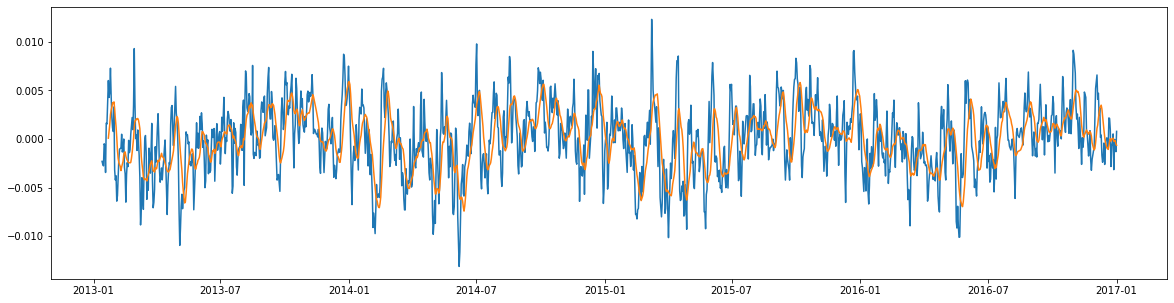

In [76]:
plt.figure(figsize=(20,5))
plt.plot(mean_pressure_log.diff(12))
plt.plot(mean_pressure_log.diff(12).rolling(window=10).mean())
plt.show()

> Ici, nous avons éliminé la composante saisonnière. Pourtant, nous pouvons voir que nous avons une légère tendance dans notre série. D'où la nécessité de la différenciation.

In [77]:
    result = adfuller(mean_pressure_log.diff(12).diff(1).dropna())
    print(f'\n{mean_pressure_log.name.upper()}')
    print(f'Statistiques ADF  : {result[0]}')
    print(f'p-value : {result[1]}')
    print('Valeurs Critiques :')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')


MEANPRESSURE
Statistiques ADF  : -15.276995551105639
p-value : 4.633227300189728e-28
Valeurs Critiques :
	1%: -3.434976549531161
	5%: -2.86358329808087
	10%: -2.5678578416363433


> La p-Value est < 0.05. La série temporelle est maintenant stationnaire. Ainsi, nous avons les paramètres suivants déjà trouvés :
>
>- m = 12
>- d = 1
>- D = 1
>
>
>### 3. Identification des paremètres p, P, q, Q
>
>
> Maintenant, c'est la partie délicate. Nous devrions examiner les tracés ACF et PACF pour déterminer les composants. Nous examinons les multiples de la période saisonnière pour détecter les composantes saisonnières et les retards de rang faible pour les composantes ARIMA.

In [78]:
mean_pressure_log_diff = mean_pressure_log.diff(12).diff(1).dropna()

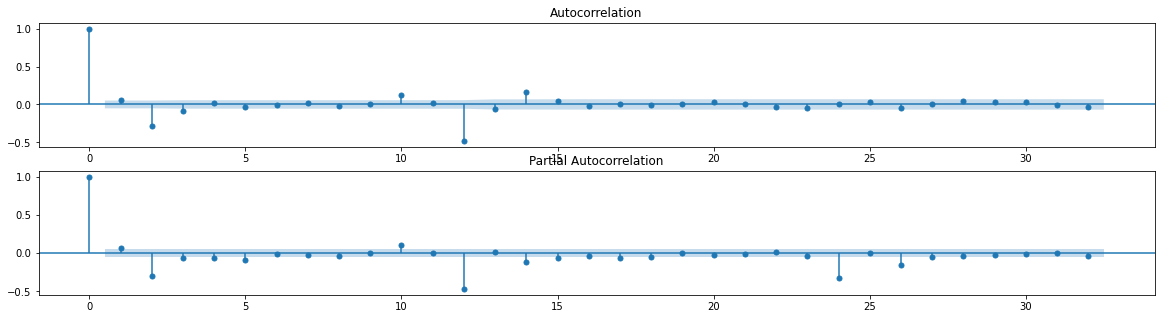

In [79]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (20,5))
acf = plot_acf(mean_pressure_log_diff, ax = ax1)
pacf = plot_pacf(mean_pressure_log_diff, ax = ax2)


>- ACF : nous pouvons voir qu'il existe un décalage significatifs de faible rang (2). Posons q = 1.
>- ACF : il semble que la composante saisonnière soit ici de 0. Puisque le décalage 12 est significatif et le 24 est nul. Nous pouvons ignorer cela ou définir le composant sur 1. Commençons par Q = 0.
>- PACF : Nous avons également un retard significatif dans les rangs inférieurs. Posons p = 1.
>- PACF : il semble que la composante saisonnière soit ici de 1. Nous identifions que les decalages 12 et 24 sont significatifs  Commençons par P=1.
>
> Nous avons donc maintenant notre modèle SARIMAX= (p=1, d=1, q=1)x(P=1, D=1, Q=0, m=12).

> ### 4. Création du modèle SARIMA

> Etant donné que la serie temporelle soit saisonniere sur 12 mois, il convient de réechantilloner la serie sur des données mensuelles.
>
>On importe la suite de la serie temporelle pour la comparer visuellement à notre prédiction. On lui applique également le réechantillonage sur des données mensuelles

In [80]:
train = mean_pressure
train = train.resample('MS').mean()

In [81]:
test = pd.read_csv('DailyDelhiClimateTest.csv', index_col='date', parse_dates=True)
test.iloc[0] = mean_pressure.iloc[-1]
test = test['meanpressure'].resample('MS').mean()

In [82]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [83]:
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,0,12))
sarima = model.fit()
sarima.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28549D+00    |proj g|=  8.23216D-02

At iterate    5    f=  1.25858D+00    |proj g|=  5.10497D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   1.479D-05   1.258D+00
  F =   1.2583325257694655     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        meanpressure   No. Observations:                   49
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                 -61.658
Date:                             Mon, 24 Oct 2022   AIC                            131.317
Time:                                     13:33:54   BIC                            137.651
Sample:                                 01-01-2013   HQIC                           133.527
                                      - 01-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0360      0.207     -0.174      0.862      -0.441       0.370
ma.L1         -0.8429      0.161     -5.236      0.000      -1.158      -0.527
ar.S.L12      -0.1028      0.222     -0.463      0.643      -0.538       0.332
sigma2         1.7283      0.482      3.585      0.000       0.783       2.673
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.55
Prob(Q):                              0.84   Prob(JB):                         0.76
Heteroskedasticity (H):               0.67   Skew:                             0.24
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

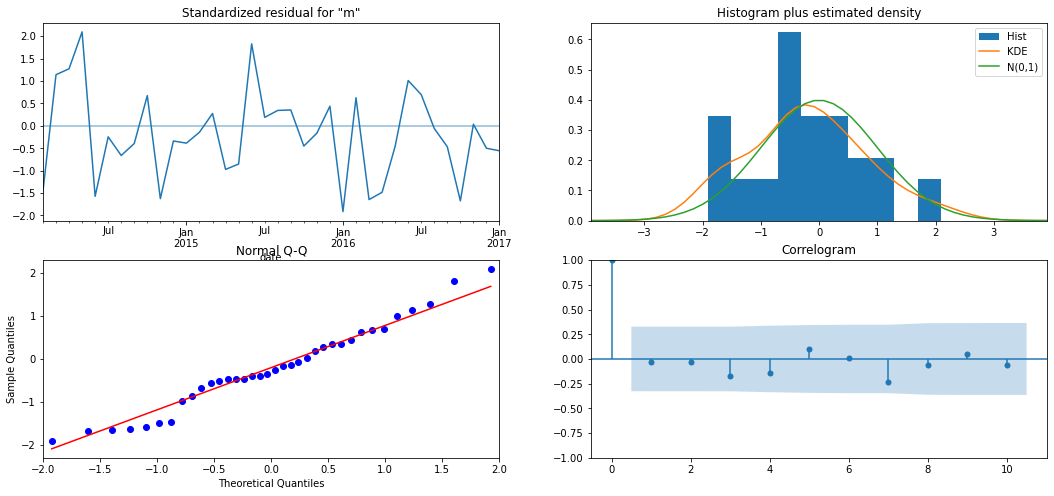

In [84]:
diagnostics = sarima.plot_diagnostics(figsize=(18, 8))

> Nous allons lancer une prédiction

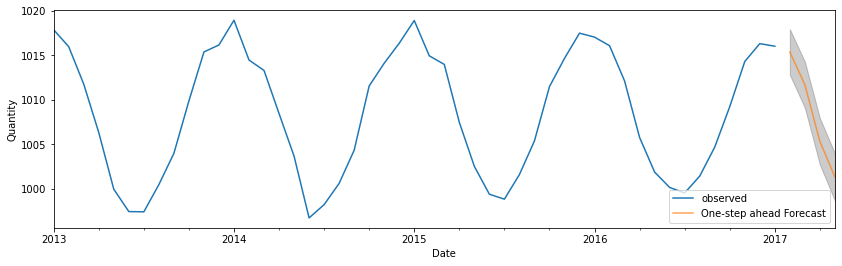

In [85]:
start = len(train)
end = len(train)+len(test)-1

prediction = sarima.get_prediction(start = start, end = end)
prediction_ci = prediction.conf_int()

ax = train.plot(label='observed')
prediction.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Quantity')
plt.legend()
plt.show()

> Nous allons ensuite lancer une prédiction avec l'intervalle de confiance

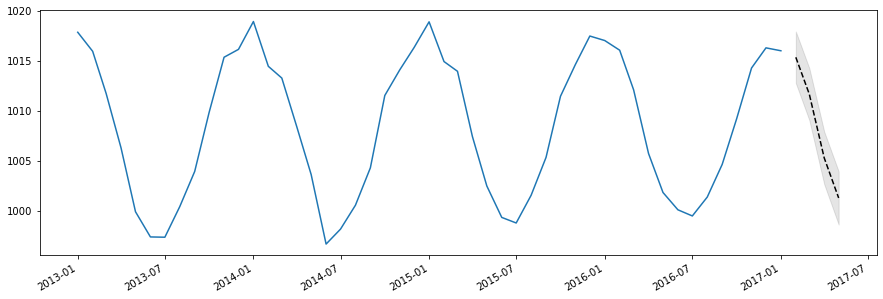

In [86]:
prediction_forecast = sarima.get_forecast(steps =4).summary_frame()
fig, ax = plt.subplots(figsize = (15,5))

plt.plot(train)
prediction_forecast['mean'].plot(ax = ax, style = 'k--') #Visualisation de la moyenne
ax.fill_between(prediction_forecast.index, prediction_forecast['mean_ci_lower'], prediction_forecast['mean_ci_upper'], color='k', alpha=0.1); #Visualisation de l'intervalle de confiance

In [87]:
from sklearn.metrics import mean_squared_error

In [88]:

    rmse = np.sqrt(mean_squared_error(test, prediction_forecast['mean']))
    print('Test RMSE: %.3f' % rmse)


Test RMSE: 3.803


> Pour la suite, nous allons comparer la prediction de la serie temporelle avec les données réelles. 
> Nous importons donc de la meme facon que la serie temporelle originale, la suite de cette derniere.

In [89]:
import datetime

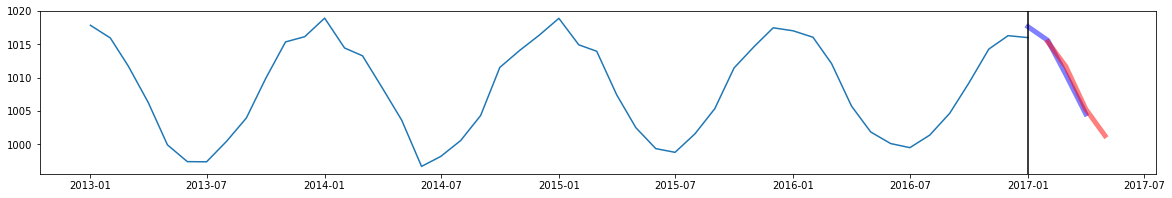

In [90]:
start = len(train)
end = len(train)+len(test)-1

prediction_comp = sarima.predict(start = start, end = end)
plt.figure(figsize=(20,3))
plt.plot(train)
plt.plot(test, lw = 5, color = 'blue',alpha = 0.5)
plt.plot(prediction_comp, lw = 5, color = 'red', alpha = 0.5)
plt.axvline(x= datetime.date(2017,1,1), color='black');


> ### 4. Evaluation
>
> Nous allons maintenant créer une fonction permettant de trouver les meilleurs parametres de SARIMA en se basant sur les score BIC (Bayesian Information Criterion) à et AIC (Akaike Information Criterion) pour evaluer et trouver les meilleurs parametres pour notre modèle.
>
> https://github.com/nalron/project_electricity_forecasting/blob/french_version/p9_notebook03.ipynb

In [98]:
import itertools
from time import time
from tqdm import tqdm_notebook
from statsmodels.stats.diagnostic import acorr_ljungbox

In [103]:
#Détermination du meilleur modèle de prévision 
#Calcul de toutes les combinaisons de p, d et q
pdq_list = list(itertools.product(range(3), range(2), range(3)))

#Calcul de toutes les combinaisons de P, D et Q
PDQ_list = [ (*val, 12) for val in list(itertools.product(range(3), range(2), range(3)))]

#Dataframe pour stockage des valeurs
results_SARIMA = pd.DataFrame({'modele':[], 'aic':[], 'bic':[], 'ljungbox':[], 'pvalues':[]})

#Itération sur toutes les combinaisons
for pdq in tqdm_notebook(pdq_list):
    for PDQ in tqdm_notebook(PDQ_list):
        #Instanciation et entrainement du modèle SARIMA
        mod = SARIMAX(mean_pressure, order = pdq, seasonal_order = PDQ, 
                      enforce_stationarity=False, enforce_invertibility=False)
        result = mod.fit(disp = False)

        #Intégration des indicateurs dans le précédent dataframe
        results_SARIMA = results_SARIMA.append({'modele':f"{pdq}x{PDQ}", 
                        'aic': result.aic, 
                        'bic': result.bic,
                        'ljungbox': acorr_ljungbox(result.resid, lags=12)[1].mean(),
                        'pvalues': result.pvalues.min()}, 
                        ignore_index=True)

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

In [107]:
#Sélection des modèles SARIMA les plus optimaux selon les tests de significativité des paramètres 
#et de blancheur du résidu sont validés au niveau 5%
results_SARIMA_filter = results_SARIMA[(results_SARIMA['ljungbox'] > 0.05)]
results_SARIMA_filter = results_SARIMA_filter[results_SARIMA_filter['pvalues'] < 0.05]

In [118]:
#Utilisation de la fonction .rank() pour déterminer la position de chaque modèle selon la minimisation AIC / BIC
results_SARIMA_filter['rank_aic'] = results_SARIMA_filter['aic'].rank(ascending=True).astype(int)
results_SARIMA_filter['rank_bic'] = results_SARIMA_filter['bic'].rank(ascending=True).astype(int)
results_SARIMA_filter['rank_combinated'] = results_SARIMA_filter['rank_aic'] + results_SARIMA_filter['rank_bic']
results_SARIMA_filter

,modele,aic,bic,ljungbox,pvalues,rank_aic,rank_bic,rank_combinated
54,"(0, 1, 0)x(0, 0, 0, 12)",5580.895232,5586.175240,0.993410,5.955024e-254,86,85,171
55,"(0, 1, 0)x(0, 0, 1, 12)",5538.044193,5548.587601,0.993431,3.098345e-253,78,74,152
56,"(0, 1, 0)x(0, 0, 2, 12)",5483.648049,5499.438038,0.993435,8.289019e-239,49,41,90
57,"(0, 1, 0)x(0, 1, 0, 12)",6480.321916,6485.593619,0.910545,2.832373e-206,104,103,207
60,"(0, 1, 0)x(1, 0, 0, 12)",5541.749408,5552.294205,0.993462,1.195931e-252,79,77,156
61,"(0, 1, 0)x(1, 0, 1, 12)",5536.805529,5552.620640,0.910262,7.563952e-231,77,78,155
62,"(0, 1, 0)x(1, 0, 2, 12)",5485.332628,5506.385946,0.928398,9.116613e-239,51,49,100
63,"(0, 1, 0)x(1, 1, 0, 12)",6048.701519,6059.229580,0.910150,8.870299e-221,99,99,198
65,"(0, 1, 0)x(1, 1, 2, 12)",5495.740059,5516.759598,0.909046,1.274845e-18,58,56,114
66,"(0, 1, 0)x(2, 0, 0, 12)",5486.855438,5502.647529,0.993449,3.260082e-239,54,44,98


> Visiblement, le modèle le plus performant serait SARIMAX= (p=2, d=0, q=2)x(P=0, D=1, Q=2, m=12). 
>
>Testons cela

In [112]:
model = SARIMAX(train, order=(2,0,2), seasonal_order=(0,1,2,12))
sarima = model.fit(disp = False)
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       meanpressure   No. Observations:                   49
Model:             SARIMAX(2, 0, 2)x(0, 1, 2, 12)   Log Likelihood                 -58.410
Date:                            Mon, 24 Oct 2022   AIC                            130.820
Time:                                    14:51:11   BIC                            142.097
Sample:                                01-01-2013   HQIC                           134.796
                                     - 01-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3847      0.617      2.246      0.025       0.176       2.593
ar.L2         -0.8939      0.541     -1.652      0.099      -1.955       0.167
ma.L1         -1.3854      8.452     -0.164      0.870     -17.951      15.180
ma.L2          0.9950     11.738      0.085      0.932     -22.011      24.000
ma.S.L12      -0.0718     96.388     -0.001      0.999    -188.989     188.845
ma.S.L24      -0.9245     89.036     -0.010      0.992    -175.432     173.583
sigma2         0.7581     73.357      0.010      0.992    -143.019     144.535
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.42
Prob(Q):                              0.91   Prob(JB):                         0.18
Heteroskedasticity (H):               0.34   Skew:                             0.74
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

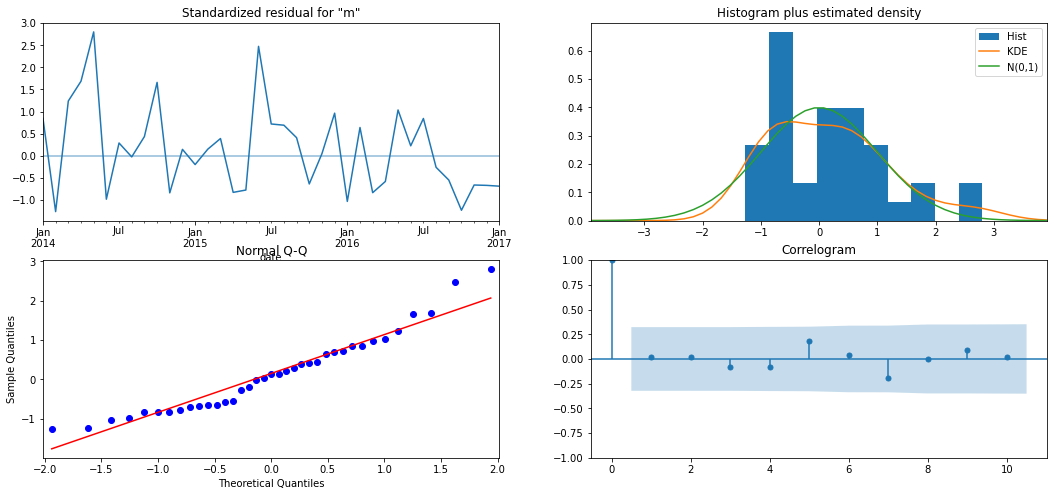

In [113]:
diagnostics = sarima.plot_diagnostics(figsize=(18, 8))

> Nous allons lancer une prédiction

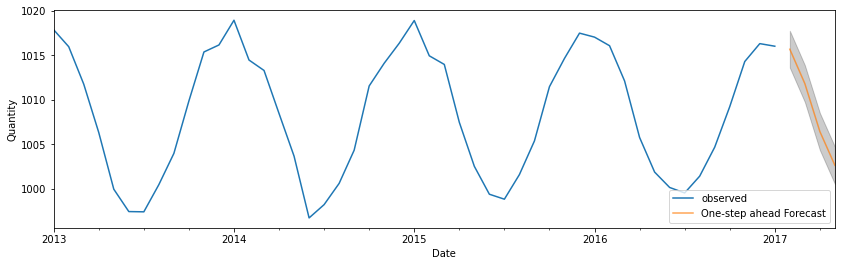

In [114]:
start = len(train)
end = len(train)+len(test)-1

prediction = sarima.get_prediction(start = start, end = end)
prediction_ci = prediction.conf_int()

ax = train.plot(label='observed')
prediction.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Quantity')
plt.legend()
plt.show()

> Nous allons ensuite lancer une prédiction avec l'intervalle de confiance

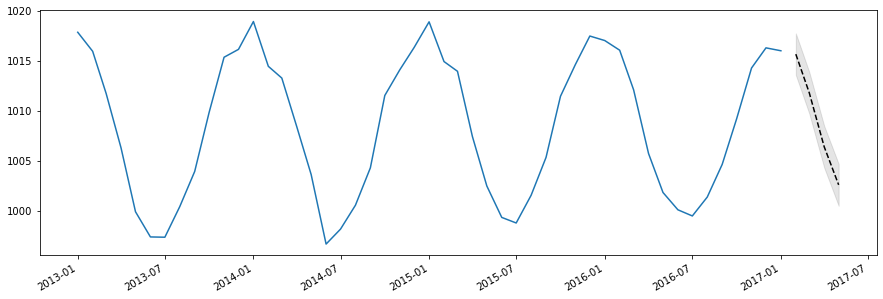

In [115]:
prediction_forecast = sarima.get_forecast(steps =4).summary_frame()
fig, ax = plt.subplots(figsize = (15,5))

plt.plot(train)
prediction_forecast['mean'].plot(ax = ax, style = 'k--') #Visualisation de la moyenne
ax.fill_between(prediction_forecast.index, prediction_forecast['mean_ci_lower'], prediction_forecast['mean_ci_upper'], color='k', alpha=0.1); #Visualisation de l'intervalle de confiance

In [116]:
rmse = np.sqrt(mean_squared_error(test, prediction_forecast['mean']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3.103


> Effectivement, le score au RMSE est meilleur avec ce model

> Pour la suite, nous allons comparer la prediction de la serie temporelle avec les données réelles. 
> Nous importons donc de la meme facon que la serie temporelle originale, la suite de cette derniere.

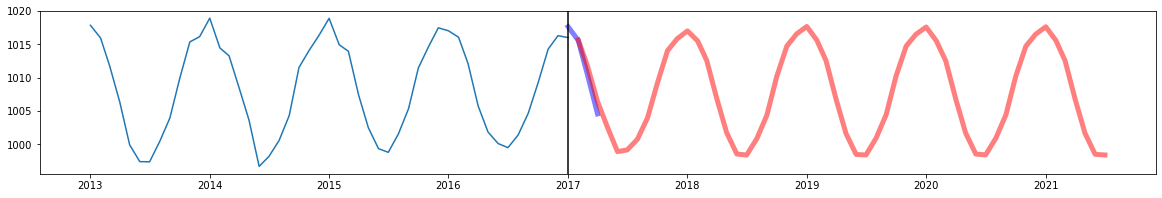

In [117]:
start = len(train)
end = len(train)+len(test)-1

prediction_comp = sarima.predict(start = start, end = end+50)
plt.figure(figsize=(20,3))
plt.plot(train)
plt.plot(test, lw = 5, color = 'blue',alpha = 0.5)
plt.plot(prediction_comp, lw = 5, color = 'red', alpha = 0.5)
plt.axvline(x= datetime.date(2017,1,1), color='black');
